In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


# Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [48]:
data=pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [49]:
ad={"Date":["1/4/2021","1/5/2021","1/6/2021","1/7/2021","1/8/2021"],
   "SPX":[3733,3739,3758,3781,3774],
   "GLD":[159.9,159.85,160.75,161.5,160.5],
   "USO":[11.37,11.38,11.46,11.58,11.52],
   "SLV":[25.51,25.52,25.66,25.74,25.64],
   "EUR/USD":[1.2332,1.2323,1.2334,1.2349,1.2351]}
ad=pd.DataFrame(ad)
data=data.append(ad,ignore_index=True)

In [50]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,1658.896788,122.815156,31.797820,20.097042,1.283544
std,527.736520,23.324569,19.525375,7.089524,0.131424
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1240.429993,109.750000,14.095000,15.570000,1.172175
50%,1552.099976,120.589996,33.849998,17.290001,1.302966
75%,2075.160034,133.010002,37.820000,23.085000,1.369760
max,3781.000000,184.589996,117.480003,47.259998,1.598798


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2295 non-null   object 
 1   SPX      2295 non-null   float64
 2   GLD      2295 non-null   float64
 3   USO      2295 non-null   float64
 4   SLV      2295 non-null   float64
 5   EUR/USD  2295 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.7+ KB


In [52]:
data.shape

(2295, 6)

In [53]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2290,1/4/2021,3733.0,159.90,11.37,25.51,1.2332
2291,1/5/2021,3739.0,159.85,11.38,25.52,1.2323
2292,1/6/2021,3758.0,160.75,11.46,25.66,1.2334
2293,1/7/2021,3781.0,161.50,11.58,25.74,1.2349
2294,1/8/2021,3774.0,160.50,11.52,25.64,1.2351


In [54]:
data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

# Missing Values

In [55]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Data Visualization

In [56]:
Target=data["GLD"]

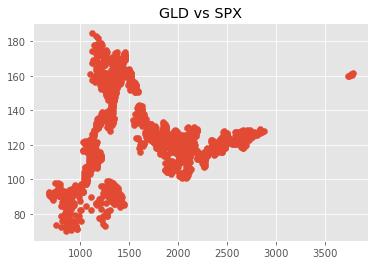

In [57]:
plt.title("GLD vs SPX")
plt.scatter(data["SPX"],Target)

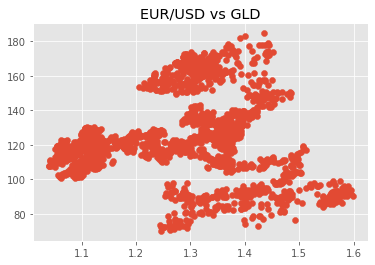

In [58]:
plt.title("EUR/USD vs GLD")
plt.scatter(data["EUR/USD"],Target)

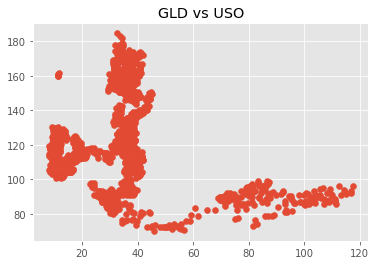

In [59]:
plt.title("GLD vs USO")
plt.scatter(data["USO"],Target)

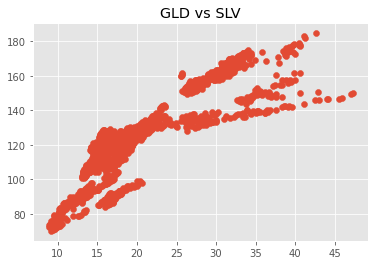

In [60]:
plt.title("GLD vs SLV")
plt.scatter(data["SLV"],Target)

(array([ 55., 232., 155., 383., 738., 257.,  73., 214., 161.,  27.]),
 array([ 70.       ,  81.4589996,  92.9179992, 104.3769988, 115.8359984,
        127.294998 , 138.7539976, 150.2129972, 161.6719968, 173.1309964,
        184.589996 ]),
 <BarContainer object of 10 artists>)

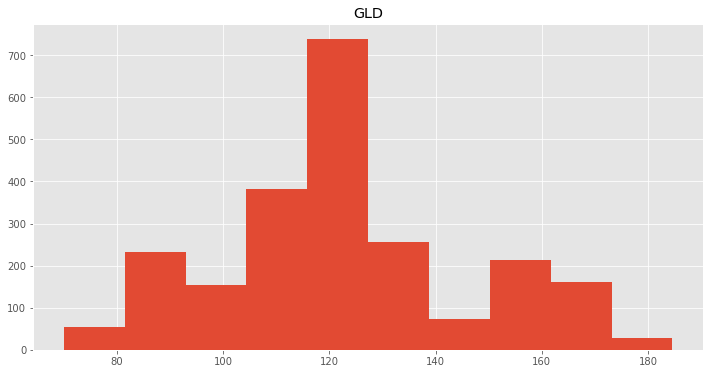

In [61]:
style.use("ggplot")
plt.figure(figsize=(12,6))
plt.title("GLD")
plt.hist(data["GLD"])

In [62]:
data_copy=data.copy()
data_copy.Date=pd.to_datetime(data_copy["Date"])
data_copy.set_index("Date")

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099
...,...,...,...,...,...
2021-01-04,3733.000000,159.900000,11.370000,25.510,1.233200
2021-01-05,3739.000000,159.850000,11.380000,25.520,1.232300
2021-01-06,3758.000000,160.750000,11.460000,25.660,1.233400


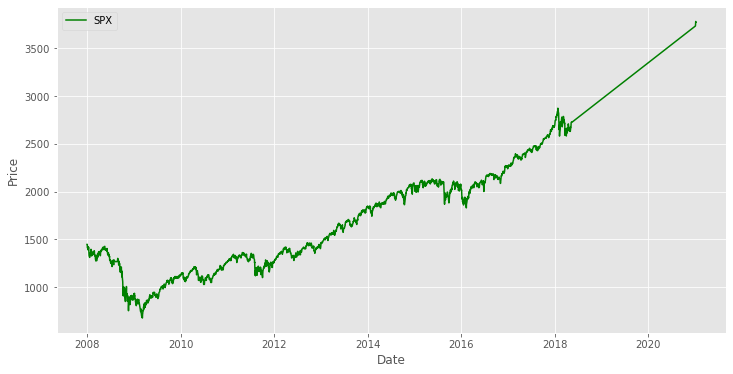

In [63]:

plt.figure(figsize=(12,6))
plt.plot(data_copy["Date"].values,data_copy["SPX"],color='green',label='SPX')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

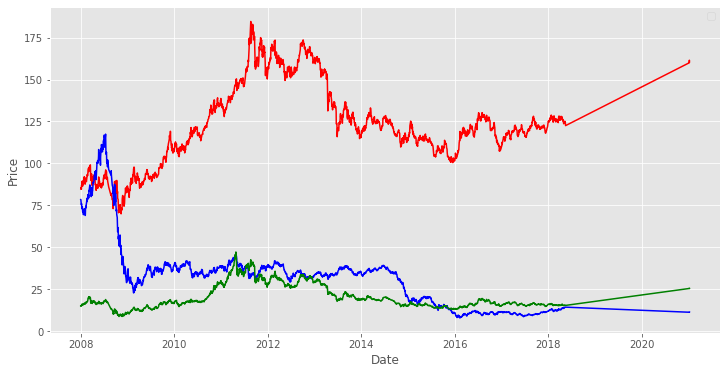

In [64]:
plt.figure(figsize=(12,6))
plt.plot(data_copy["Date"].values,data_copy["GLD"],color="red")
plt.plot(data_copy['Date'].values,data_copy["USO"],color='blue')
plt.plot(data_copy["Date"].values,data_copy["SLV"],color='green')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

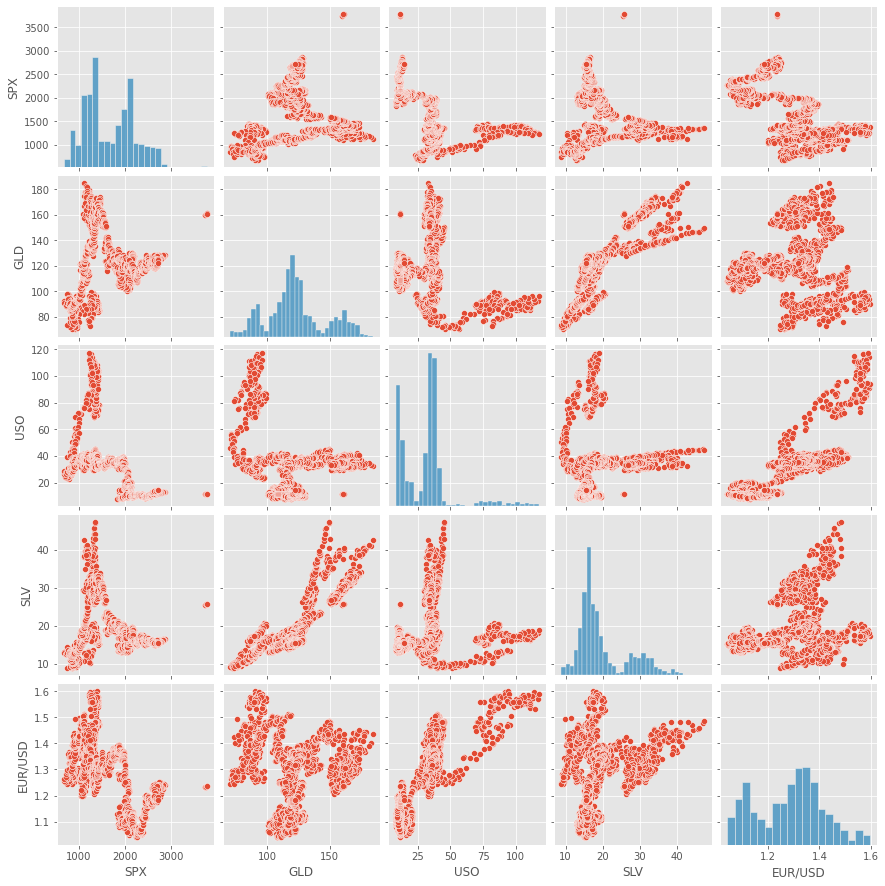

In [65]:
style.use("ggplot")
sns.pairplot(data)

# Correlation

In [66]:
corr=data.corr()

<AxesSubplot:>

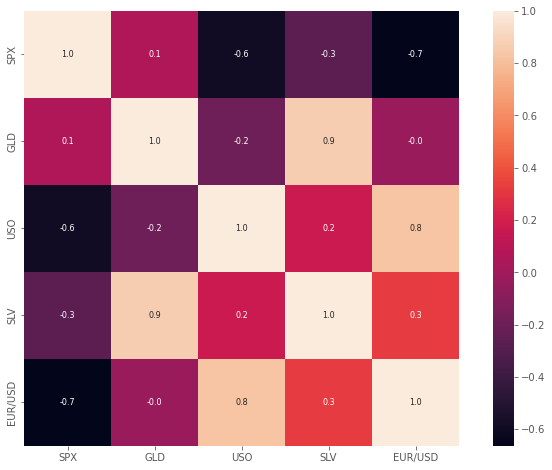

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,cbar='True',square = 'True',annot = True ,annot_kws={'size':8},fmt='.1F')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

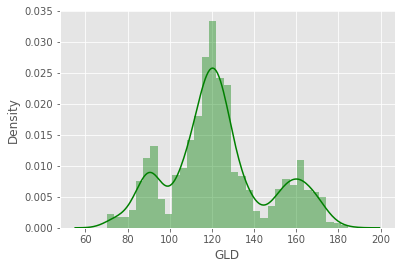

In [68]:
sns.distplot(data['GLD'],color='green')

# DataSplit

In [69]:
X=data_copy[['SPX', 'USO', 'SLV', 'EUR/USD']]
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [70]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099
...,...,...,...,...
2290,3733.000000,11.370000,25.510,1.233200
2291,3739.000000,11.380000,25.520,1.232300
2292,3758.000000,11.460000,25.660,1.233400
2293,3781.000000,11.580000,25.740,1.234900


In [71]:
Target.head

<bound method NDFrame.head of 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2290    159.900000
2291    159.850000
2292    160.750000
2293    161.500000
2294    160.500000
Name: GLD, Length: 2295, dtype: float64>

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Target, test_size = 0.2, random_state=2)

# Model Training

In [73]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [74]:
test_data_prediction = model.predict(X_test)

In [75]:
error = r2_score(Y_test,test_data_prediction)
error

0.9896328493050027

In [76]:
model.score(X_test,Y_test)

0.9896328493050027

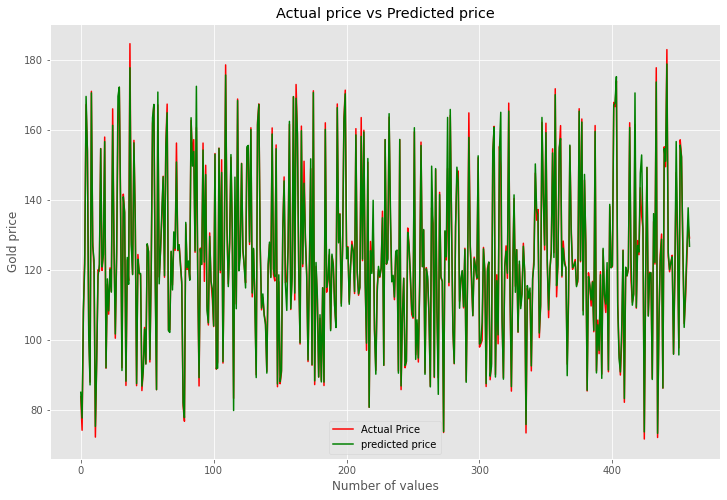

In [77]:
Y_test = list(Y_test)
plt.figure(figsize=(12,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(test_data_prediction , color='green', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

# Now Using Active Learning

In [78]:
features = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
target = data['GLD']

In [79]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(features, target, train_size=0.1, random_state=0)
m = RandomForestRegressor(n_estimators=100)
m.fit(X_labeled, y_labeled)

RandomForestRegressor()

In [80]:
query_index = np.argmax(np.abs(y_unlabeled - m.predict(X_unlabeled)))
query_index

452

In [81]:
query_instance= X_unlabeled[query_index:query_index+1]
query_label=y_unlabeled[query_index:query_index+1]


In [82]:
X_labeled = np.vstack([X_labeled, query_instance])
y_labeled = np.hstack([y_labeled, query_label])


In [83]:

X_unlabeled = X_unlabeled.drop(index=query_index)
y_unlabeled = y_unlabeled.drop(index=688)

In [84]:
m.fit(X_labeled, y_labeled)

RandomForestRegressor()

In [85]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
y_predict=m.predict(X_test)
m.score(X_test,Y_test)

0.9725664936595626

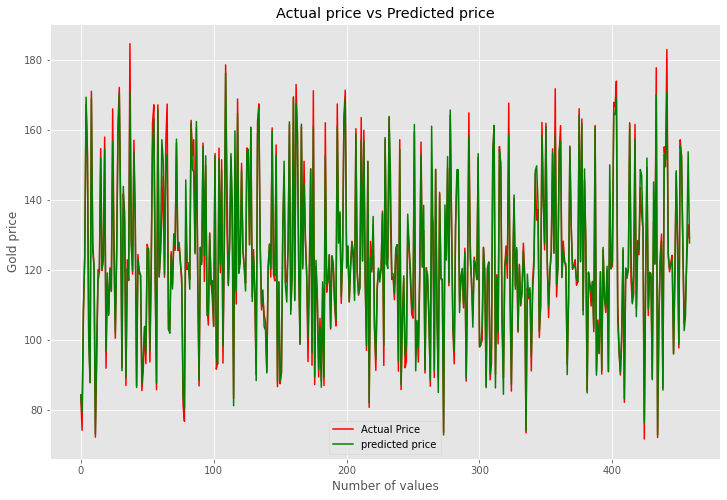

In [86]:
Y_test=list(Y_test)
plt.figure(figsize=(12,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(y_predict , color='green', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

In [87]:
test=np.array([[3733,11.37,25.51,1.2332],
              [3739,11.38,25.52,1.2323],
              [3758,11.46,25.66,1.2334],
              [3781,11.58,25.74,1.2349]])
t=m.predict(test)
print(t)

[146.79439986 146.79439986 149.3974002  149.3974002 ]


In [88]:
t={
    "SPX":[3810,3795],
    "USO":[11.59,11.57],
    "SLV":[25.87,25.79],
    "EUR/USD":[1.2381,1.2388]
}
t=pd.DataFrame(t)
t=model.predict(t)
print(t)

[160.46589991 160.93449991]
